In [79]:
import numpy as np
import pandas as pd
import statsmodels.tsa.stattools 

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


In [80]:
df = pd.read_excel('data1.xlsx')
df

,Year,GDP,Export,Population
0,1960,89.035239,4.273477e+08,48013505
1,1961,97.595292,5.194485e+08,49362834
2,1962,100.122130,5.460869e+08,50752150
3,1963,101.901413,5.310673e+08,52202008
4,1964,100.221104,5.401358e+08,53741721
...,...,...,...,...
56,2016,1401.564635,3.686500e+10,157977151
57,2017,1563.767819,3.754680e+10,159685421
58,2018,1698.132081,4.056039e+10,161376713
59,2019,1855.691510,4.636254e+10,163046173


In [81]:
# Parse strings to datetime type
indexeddf = df.set_index(['Year'])

In [82]:
indexeddf.head(5)

,GDP,Export,Population
Year,,,
1960,89.035239,4.273477e+08,48013505
1961,97.595292,5.194485e+08,49362834
1962,100.122130,5.460869e+08,50752150
1963,101.901413,5.310673e+08,52202008
1964,100.221104,5.401358e+08,53741721


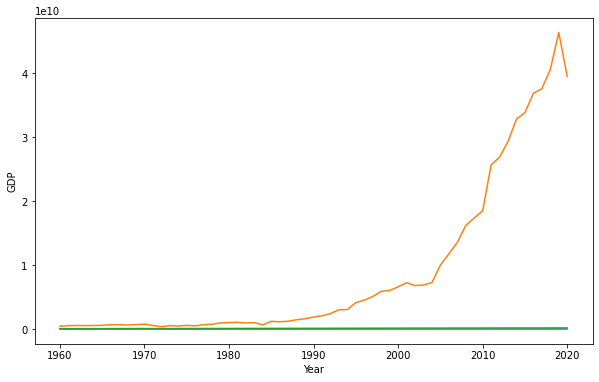

In [83]:
## plot graph
plt.xlabel("Year")
plt.ylabel("GDP")
plt.plot(indexeddf)

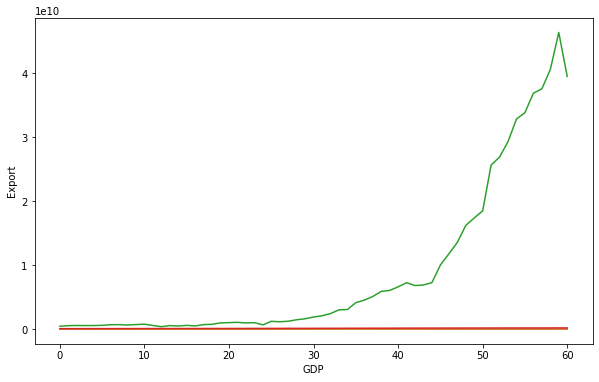

In [86]:
plt.xlabel("Year")
plt.ylabel("Export")
plt.plot(df)

In [35]:
data.keys()

Index(['GDP per capita (current USD)', 'Exports of goods and services (current USD)'], dtype='object')

In [36]:
df.describe()

,Year,GDP,Export,Population
count,61.000000,61.000000,6.100000e+01,6.100000e+01
mean,1990.000000,458.373757,8.726693e+09,1.046277e+08
std,17.752934,457.393593,1.270903e+10,3.691576e+07
min,1960.000000,89.035239,3.568410e+08,4.801350e+07
25%,1975.000000,141.197159,6.750280e+08,7.006631e+07
50%,1990.000000,293.160421,1.866930e+09,1.031720e+08
75%,2005.000000,499.461940,9.994813e+09,1.390355e+08
max,2020.000000,1968.792225,4.636254e+10,1.646894e+08


In [37]:
df.corr()

,Year,GDP,Export,Population
Year,1.000000,0.823913,0.810348,0.997318
GDP,0.823913,1.000000,0.978308,0.818692
Export,0.810348,0.978308,1.000000,0.810812
Population,0.997318,0.818692,0.810812,1.000000


In [38]:
df.cov()

,Year,GDP,Export,Population
Year,3.151667e+02,6.690235e+03,1.828328e+11,6.536053e+08
GDP,6.690235e+03,2.092089e+05,5.686936e+12,1.382363e+10
Export,1.828328e+11,5.686936e+12,1.615195e+20,3.804034e+17
Population,6.536053e+08,1.382363e+10,3.804034e+17,1.362773e+15


## Logarithmic Transformation

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'GDP'}>],
       [<AxesSubplot:title={'center':'Export'}>,
        <AxesSubplot:title={'center':'Population'}>]], dtype=object)

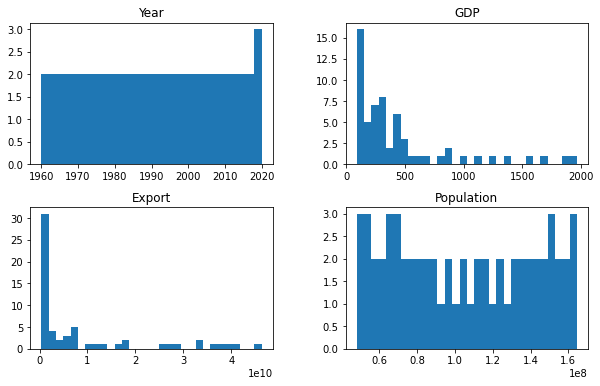

In [39]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [40]:
df['GDPlog'] = np.log(df["GDP"])
df['Exportlog'] = np.log(df["Export"])
df['Poplog'] = np.log(df["Population"])
df

,Year,GDP,Export,Population,GDPlog,Exportlog,Poplog
0,1960,89.035239,4.273477e+08,48013505,4.489032,19.873109,17.686993
1,1961,97.595292,5.194485e+08,49362834,4.580829,20.068278,17.714708
2,1962,100.122130,5.460869e+08,50752150,4.606391,20.118289,17.742465
3,1963,101.901413,5.310673e+08,52202008,4.624006,20.090399,17.770632
4,1964,100.221104,5.401358e+08,53741721,4.607379,20.107331,17.799700
...,...,...,...,...,...,...,...
56,2016,1401.564635,3.686500e+10,157977151,7.245344,24.330528,18.877961
57,2017,1563.767819,3.754680e+10,159685421,7.354853,24.348854,18.888716
58,2018,1698.132081,4.056039e+10,161376713,7.437284,24.426058,18.899252
59,2019,1855.691510,4.636254e+10,163046173,7.526013,24.559758,18.909544


In [41]:
df.keys()

Index(['Year', 'GDP', 'Export', 'Population', 'GDPlog', 'Exportlog', 'Poplog'], dtype='object')

In [44]:
#Create a lag value

df['GDP lag'] = df['GDPlog'].shift(1)
df['Export lag'] = df['Exportlog'].shift(1)
df['Population lag'] = df['Poplog'].shift(1)
df

,Year,GDP,Export,Population,GDPlog,Exportlog,Poplog,GDP lag,Export lag,Population lag
0,1960,89.035239,4.273477e+08,48013505,4.489032,19.873109,17.686993,NaN,NaN,NaN
1,1961,97.595292,5.194485e+08,49362834,4.580829,20.068278,17.714708,4.489032,19.873109,17.686993
2,1962,100.122130,5.460869e+08,50752150,4.606391,20.118289,17.742465,4.580829,20.068278,17.714708
3,1963,101.901413,5.310673e+08,52202008,4.624006,20.090399,17.770632,4.606391,20.118289,17.742465
4,1964,100.221104,5.401358e+08,53741721,4.607379,20.107331,17.799700,4.624006,20.090399,17.770632
...,...,...,...,...,...,...,...,...,...,...
56,2016,1401.564635,3.686500e+10,157977151,7.245344,24.330528,18.877961,7.129661,24.244323,18.867008
57,2017,1563.767819,3.754680e+10,159685421,7.354853,24.348854,18.888716,7.245344,24.330528,18.877961
58,2018,1698.132081,4.056039e+10,161376713,7.437284,24.426058,18.899252,7.354853,24.348854,18.888716
59,2019,1855.691510,4.636254e+10,163046173,7.526013,24.559758,18.909544,7.437284,24.426058,18.899252


In [46]:
df.corr().round(2)

,Year,GDP,Export,Population,GDPlog,Exportlog,Poplog,GDP lag,Export lag,Population lag
Year,1.00,0.82,0.81,1.00,0.97,0.97,0.99,0.97,0.96,0.99
GDP,0.82,1.00,0.98,0.82,0.91,0.87,0.75,0.91,0.88,0.76
Export,0.81,0.98,1.00,0.81,0.89,0.88,0.73,0.89,0.89,0.74
Population,1.00,0.82,0.81,1.00,0.97,0.98,0.99,0.97,0.97,0.99
GDPlog,0.97,0.91,0.89,0.97,1.00,0.97,0.94,0.98,0.96,0.94
Exportlog,0.97,0.87,0.88,0.98,0.97,1.00,0.94,0.96,0.99,0.94
Poplog,0.99,0.75,0.73,0.99,0.94,0.94,1.00,0.94,0.94,1.00
GDP lag,0.97,0.91,0.89,0.97,0.98,0.96,0.94,1.00,0.97,0.94
Export lag,0.96,0.88,0.89,0.97,0.96,0.99,0.94,0.97,1.00,0.94
Population lag,0.99,0.76,0.74,0.99,0.94,0.94,1.00,0.94,0.94,1.00


## Test for Stationarity

In [53]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [54]:
from statsmodels.tsa.stattools import adfuller

## Regression

In [ ]:
y_var = ["GDP log"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
          "RGDP Per Capita Lag"]

reg_vars = y_var + x_vars
reg_data = data[reg_vars]
reg_data.corr().round(2)